# Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import pickle, os
from IPython.display import clear_output

In [2]:
from tqdm.auto import tqdm, trange
tqdm.pandas()

D:\Users\Ritvik\Anaconda3\envs\ailab\lib\site-packages\tqdm\std.py:668: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel


In [3]:
pd.options.display.max_colwidth = -1

from dsutils import *

D:\Users\Ritvik\Anaconda3\envs\ailab\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  """Entry point for launching an IPython kernel.
Using TensorFlow backend.


# Data

In [4]:
data = pd.read_csv('data.csv')

# Vectorizisation and Over Sampling

In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(smooth_idf=True)
vectorizer.fit(data['Text'].astype(str))

vector = vectorizer.transform(data['Text'].astype(str))
y = data['Spam'].astype('int').values

print('X shape', vector.shape)
print('Y shape', y.shape)

X shape (31730, 282252)
Y shape (31730,)


# Machine Learning

In [6]:
from sklearn.naive_bayes import MultinomialNB, GaussianNB, BernoulliNB
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier, GradientBoostingClassifier, BaggingClassifier, RandomForestClassifier

## Multinomial NB


Mean Loss 0.6884021430822566 +- 0.004474927079318753


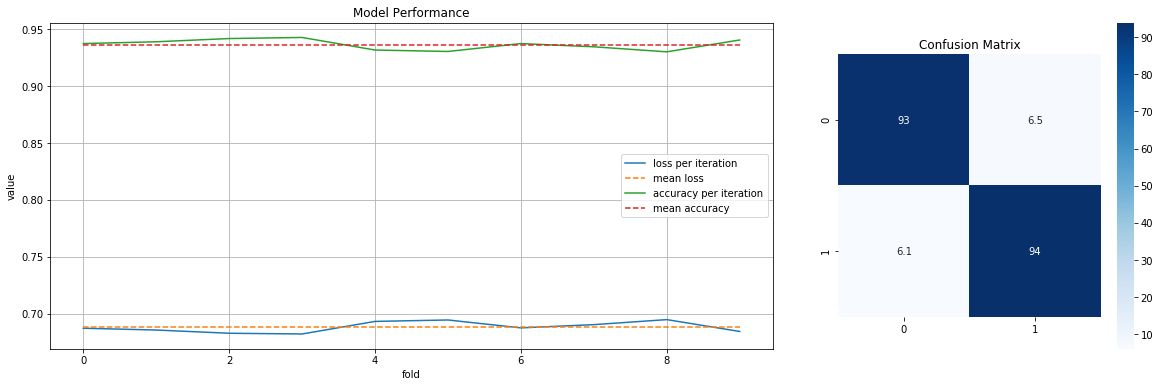

In [7]:
model = MultinomialNB()
mnb_performance, mnb_cm, mnb_model = train_model_on_vects(model, vector, y, oversample='random')
print('Mean Loss', np.mean(mnb_performance['loss']), '+-', np.std(mnb_performance['loss']))

## Bernoulli NB


Mean Loss 0.7518751969744721 +- 0.003475478227231924


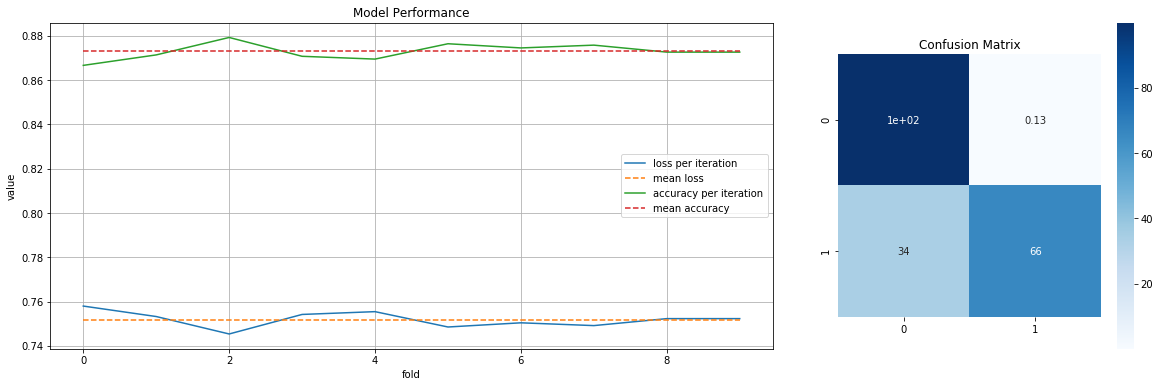

In [8]:
model = BernoulliNB()
bnb_performance, bnb_cm, bnb_model = train_model_on_vects(model, vector, y, oversample='random')
print('Mean Loss', np.mean(bnb_performance['loss']), '+-', np.std(bnb_performance['loss']))

## Logistic Regression


Mean Loss 0.6591238575480618 +- 0.003878378837167401


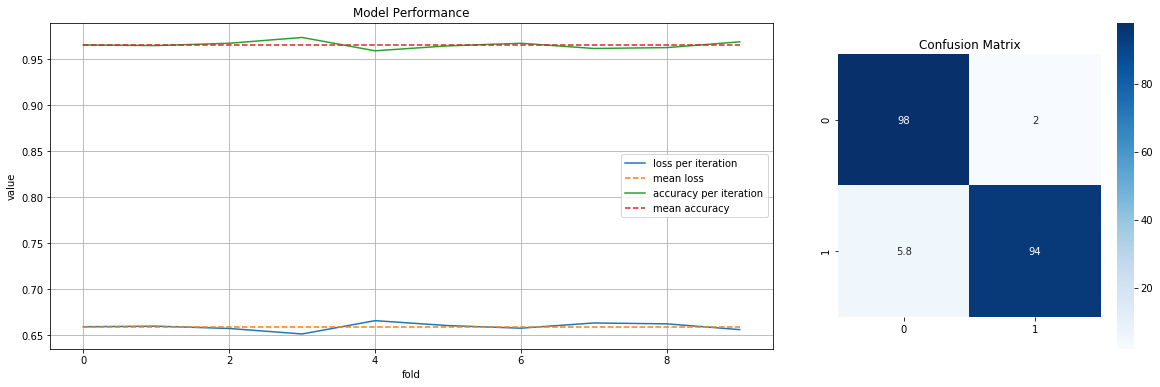

In [9]:
model = LogisticRegression(solver='liblinear', penalty='l1', max_iter=1000, random_state=101, warm_start=True)
lr1_performance, lr1_cm, lr1_model = train_model_on_vects(model, vector, y, oversample='random')
print('Mean Loss', np.mean(lr1_performance['loss']), '+-', np.std(lr1_performance['loss']))


Mean Loss 0.653514024582414 +- 0.002346613358838486


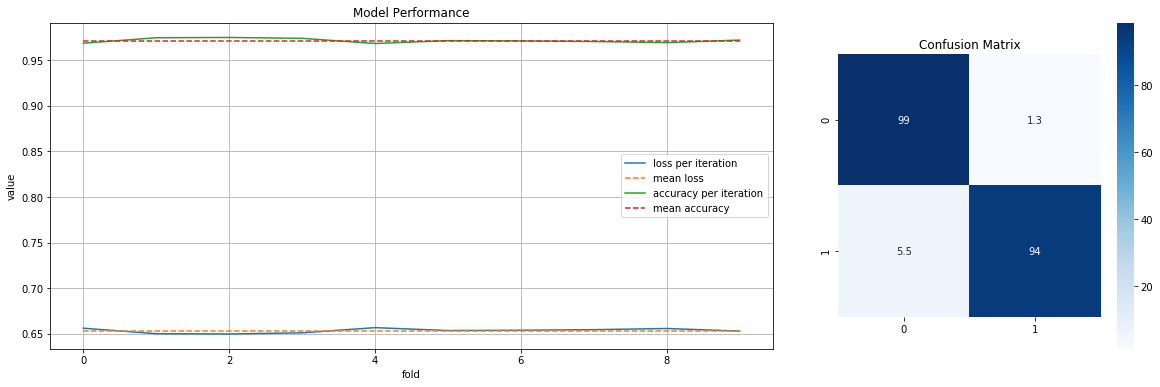

In [10]:
model = LogisticRegression(solver='lbfgs', max_iter=1000, random_state=101, warm_start=True)
lr2_performance, lr2_cm, lr2_model = train_model_on_vects(model, vector, y, oversample='random')
print('Mean Loss', np.mean(lr2_performance['loss']), '+-', np.std(lr2_performance['loss']))

## SGD Classifier - log loss


Mean Loss 0.6746927198235109 +- 0.0032472100529193277


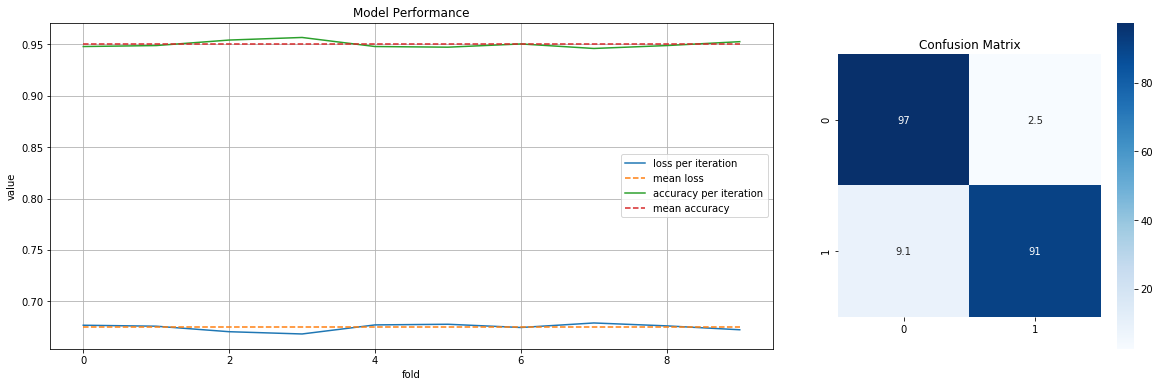

In [11]:
model = SGDClassifier(loss='log', max_iter=1000, tol=0.001, penalty='l1', random_state=101, warm_start=True)
sgdl1_performance, sgdl1_cm, sgdl1_model = train_model_on_vects(model, vector, y, oversample='random')
print('Mean Loss', np.mean(sgdl1_performance['loss']), '+-', np.std(sgdl1_performance['loss']))


Mean Loss 0.6616451307910495 +- 0.0020579675660024528


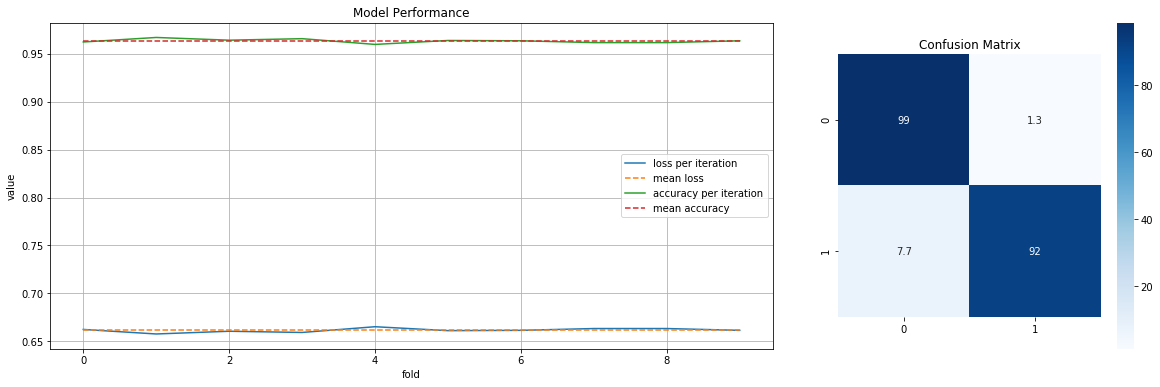

In [12]:
model = SGDClassifier(loss='log', max_iter=1000, tol=0.001, penalty='l2', random_state=101, warm_start=True)
sgdl2_performance, sgdl2_cm, sgdl2_model = train_model_on_vects(model, vector, y, oversample='random')
print('Mean Loss', np.mean(sgdl2_performance['loss']), '+-', np.std(sgdl2_performance['loss']))

## SGD Classifier - hinge loss


Mean Loss 0.6667191931925622 +- 0.0039470460145385675


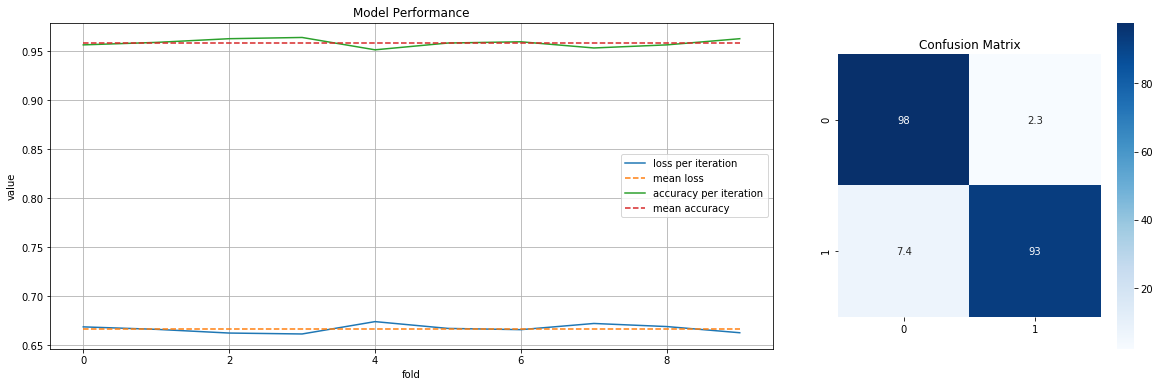

In [13]:
model = SGDClassifier(loss='hinge', max_iter=1000, tol=0.001, penalty='l1', random_state=101, warm_start=True)
sgdh1_performance, sgdh1_cm, sgdh1_model = train_model_on_vects(model, vector, y, oversample='random')
print('Mean Loss', np.mean(sgdh1_performance['loss']), '+-', np.std(sgdh1_performance['loss']))


Mean Loss 0.6513394264103372 +- 0.002740435261056212


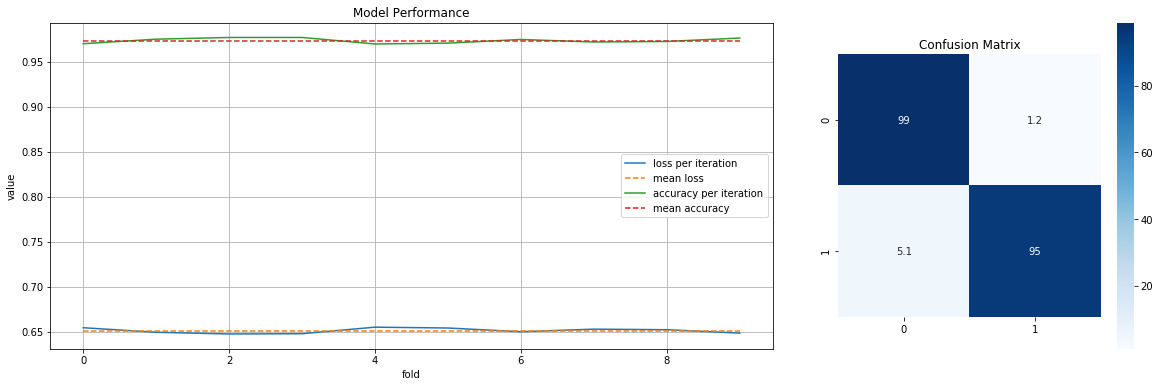

In [14]:
model = SGDClassifier(loss='hinge', max_iter=1000, tol=0.001, penalty='l2', random_state=101, warm_start=True)
sgdh2_performance, sgdh2_cm, sgdh2_model = train_model_on_vects(model, vector, y, oversample='random')
print('Mean Loss', np.mean(sgdh2_performance['loss']), '+-', np.std(sgdh2_performance['loss']))

## SGD Classifier - perceptron loss


Mean Loss 0.8069019855026788 +- 0.10006926533611334


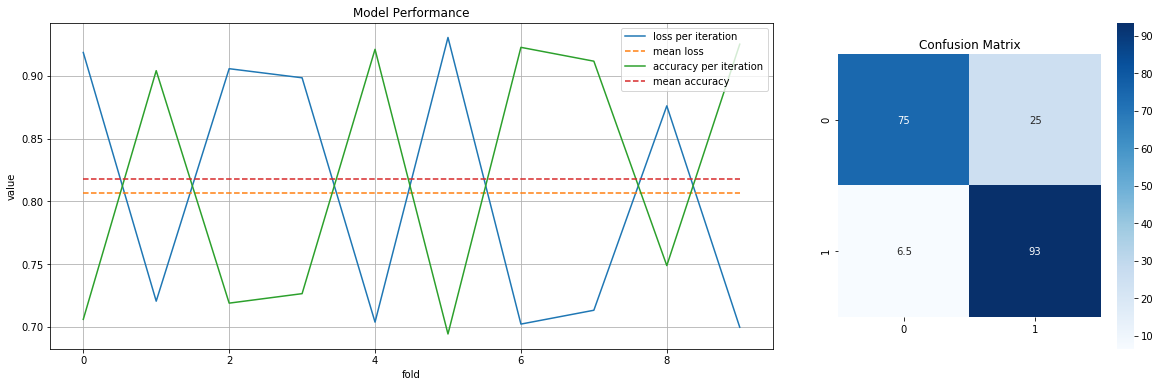

In [15]:
model = SGDClassifier(loss='perceptron', max_iter=1000, tol=0.001, penalty='l1', random_state=101, warm_start=True)
sgdp1_performance, sgdp1_cm, sgdp1_model = train_model_on_vects(model, vector, y, oversample='random')
print('Mean Loss', np.mean(sgdp1_performance['loss']), '+-', np.std(sgdp1_performance['loss']))


Mean Loss 0.6542704065553104 +- 0.0023415286001899453


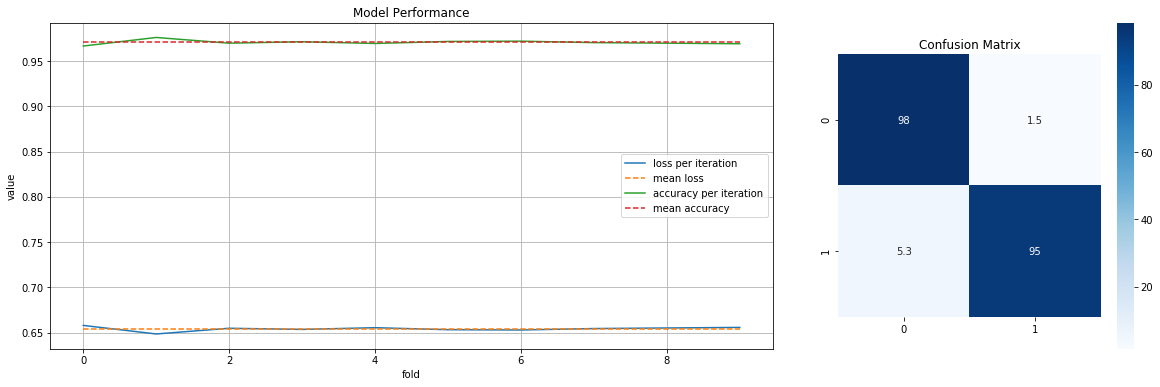

In [16]:
model = SGDClassifier(loss='perceptron', max_iter=1000, tol=0.001, penalty='l2', random_state=101, warm_start=True)
sgdp2_performance, sgdp2_cm, sgdp2_model = train_model_on_vects(model, vector, y, oversample='random')
print('Mean Loss', np.mean(sgdp2_performance['loss']), '+-', np.std(sgdp2_performance['loss']))

## Decision Tree


Mean Loss 0.6765206429246768 +- 0.005161687384197491


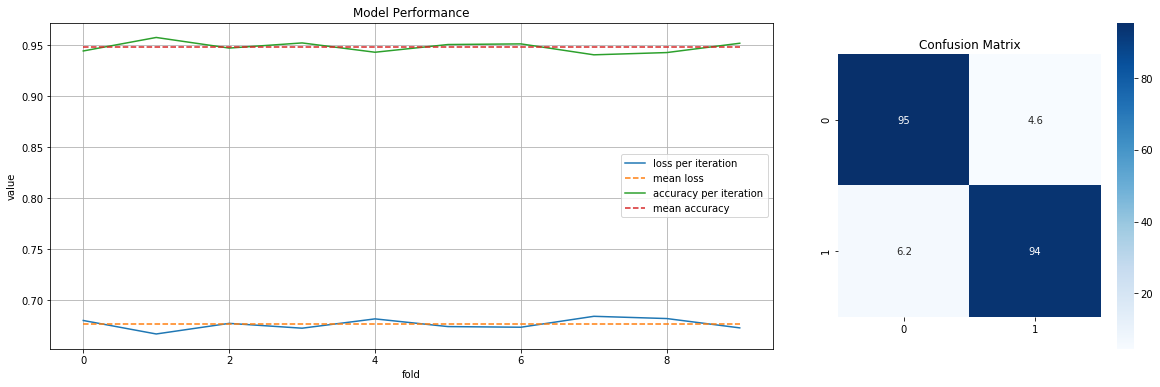

In [17]:
model = DecisionTreeClassifier(random_state=101)
dt_performance, dt_cm, dt_model = train_model_on_vects(model, vector, y, oversample='random')
print('Mean Loss', np.mean(dt_performance['loss']), '+-', np.std(dt_performance['loss']))

In [18]:
cm = [
    mnb_cm, bnb_cm, lr1_cm, lr2_cm, sgdl1_cm, sgdl2_cm, sgdh1_cm, sgdh2_cm, sgdp1_cm, sgdp2_cm, dt_cm
]

model = [
    'MultinomialNB', 'BernoulliNB', 'LogisticRegression1', 'LogisticRegression2', 'SGDClassifierL1', 'SGDClassifierL2',
    'SGDClassifierH1', 'SGDClassifierH2', 'SGDClassifierP1', 'SGDClassifierP2', 'DecisionTreeClassifier'
]

performance = pd.DataFrame({
    'FP': [x[0][1] for x in cm],
    'FN': [x[1][0] for x in cm]
}, index=model)

In [19]:
performance

,FP,FN
MultinomialNB,6.531423,6.057278
BernoulliNB,0.131132,33.638543
LogisticRegression1,1.972040,5.847237
LogisticRegression2,1.260884,5.536439
SGDClassifierL1,2.501594,9.115241
SGDClassifierL2,1.255859,7.712409
SGDClassifierH1,2.274642,7.367864
SGDClassifierH2,1.175153,5.099556
SGDClassifierP1,25.214215,6.528078
SGDClassifierP2,1.543351,5.267595



Mean Loss 0.651591553734636 +- 0.0022429503118383985


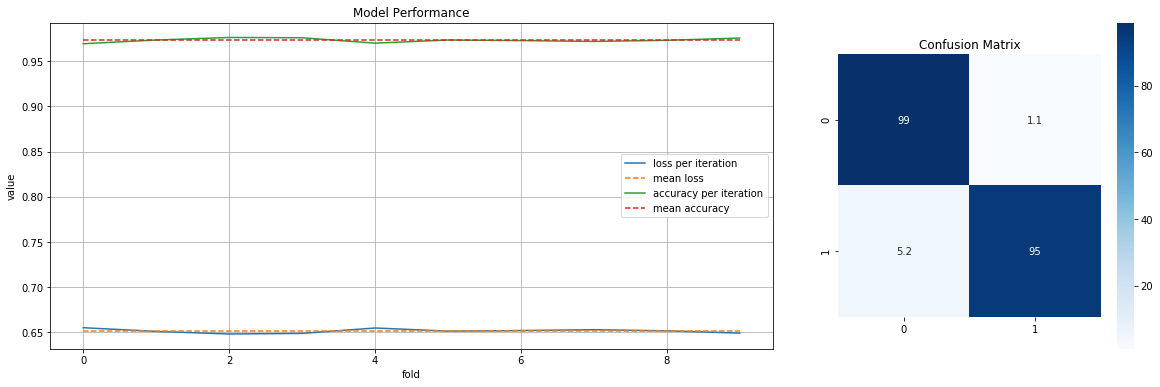

In [20]:
model = VotingClassifier(estimators=[
    ('MNB', MultinomialNB()),
    ('LR-1', LogisticRegression(solver='liblinear', max_iter=100000, class_weight='balanced', random_state=101, 
                                warm_start=True)),
    ('LR-2', LogisticRegression(solver='lbfgs', max_iter=100000, class_weight='balanced', random_state=101, warm_start=True)),
    ('SGD-L1', SGDClassifier(loss='log', max_iter=100000, tol=0.001, penalty='l1', random_state=101, warm_start=True, 
                             class_weight='balanced', early_stopping=True)),
    ('SGD-L2', SGDClassifier(loss='log', max_iter=100000, tol=0.001, penalty='l2', random_state=101, warm_start=True, 
                             class_weight='balanced', early_stopping=True)),
    ('SGD-H1', SGDClassifier(loss='hinge', max_iter=100000, tol=0.001, penalty='l1', random_state=101, warm_start=True, 
                             class_weight='balanced', early_stopping=True)),
    ('SGD-H2', SGDClassifier(loss='hinge', max_iter=100000, tol=0.001, penalty='l2', random_state=101, warm_start=True, 
                             class_weight='balanced', early_stopping=True)),
    ('SGD-P2', SGDClassifier(loss='perceptron', max_iter=100000, tol=0.001, penalty='l2', random_state=101, warm_start=True,
                             class_weight='balanced', early_stopping=True)),
    ('DT', DecisionTreeClassifier(random_state=101)),
], weights=[0.6, 1.1, 2.1, 0.7, 0.9, 1, 2.1, 3, 1.95])
v_performance, v_cm, v_model = train_model_on_vects(model, vector, y, oversample='random')
print('Mean Loss', np.mean(v_performance['loss']), '+-', np.std(v_performance['loss']))

In [21]:
pickle.dump(vectorizer, open('Vectorizer-spam-2.pkl', 'wb'))

In [22]:
pickle.dump(v_model, open('SpamClassifier-2.pkl', 'wb'))